In [20]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave
# %pip install librosa

Conversão para .WAV

In [21]:
# # import required modules
# import subprocess

# # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'teste.mp3',
#                  'teste.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

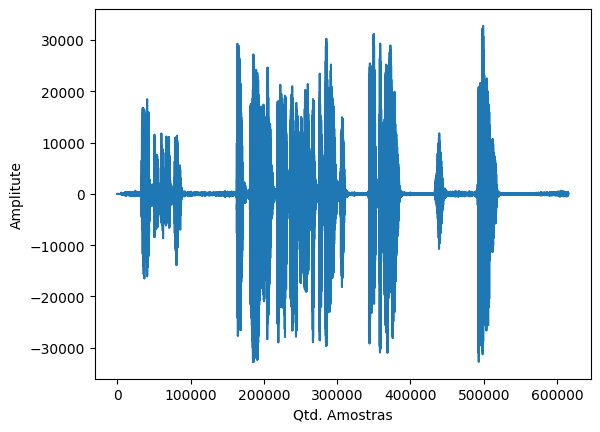

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('joao.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
# data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

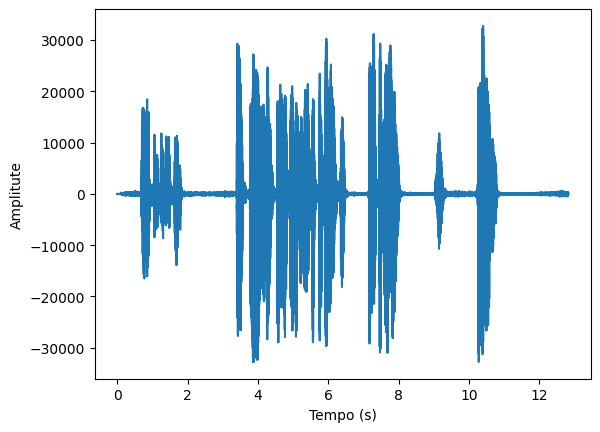

In [23]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 48000 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

307627

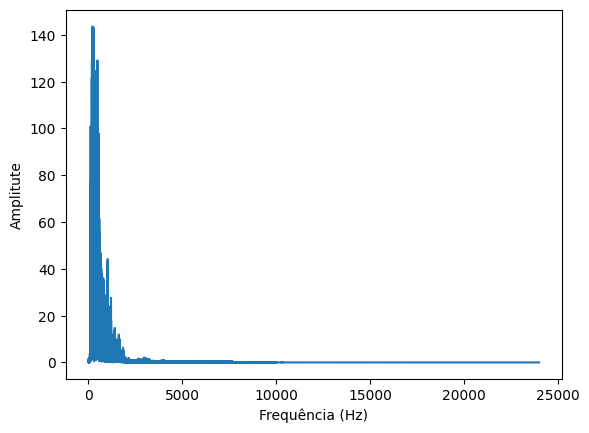

In [24]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')


# plt.ylim([0, 50])
# plt.xlim([0, 30])
len(transf[f > 0]*1/n)


In [25]:
# import pandas as pd

# df_transf = pd.DataFrame(transf[f > 0]*1/n)
# df_transf.columns = ['Amplitude']
# df_valores = pd.DataFrame()

# cont = 0
# hashtags = []
# f_hashtag = ''

# for i in range(0, int(df_transf['Amplitude'].max()) + 100, 10) :
#    cont = 0
#    for j in df_transf['Amplitude']:
#       if j > i :  
#          cont+=1
#    # print(f'Número de valores de Amplitude maiores que {i} e menores que {i+100}: {cont}')
#    if (cont > 0):
#       hashtag = f"{i}{i+100}{cont}"
#       hashtags.append(hashtag)
   
# f_hashtag = ' '.join(hashtags)

# print(f'Hashtag para essa música: {f_hashtag}')


In [26]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

In [27]:
# ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
# fuzfactor = 1  # Fator de ajuste menor para mais precisão

# # Inicialização dos highscores e points para os intervalos de interesse
# highscores = [0] * len(ranges)
# points = [0] * len(ranges)

# # Processamento da transformada completa
# for freq in range(40, 301):
#     if transf[freq] > 0:
#         mag = np.log(np.abs(transf[freq]) + 1)
#         i = 0
#         while i < len(ranges) and ranges[i] < freq:
#             i += 1
#         if i < len(ranges) and mag > highscores[i]:
#             highscores[i] = mag
#             points[i] = freq

# # Cálculo da hashtag única com mais detalhes
# h = 0
# for i in range(len(points)):
#     h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

# print(f"Hashtag: {h}")

# # Extraindo os pontos individuais para leitura
# h_copy = h
# extracted_points = []

# for i in range(len(points)):
#     factor = 10 ** (len(points) - i - 1)
#     point = (h_copy // factor) * fuzfactor
#     extracted_points.append(point)
#     h_copy %= factor

# print(f"Frequencias: {extracted_points}")


In [28]:
import librosa
# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

S = librosa.stft(f, n_fft=320, hop_length=10, win_length=320)
S = np.abs(S)

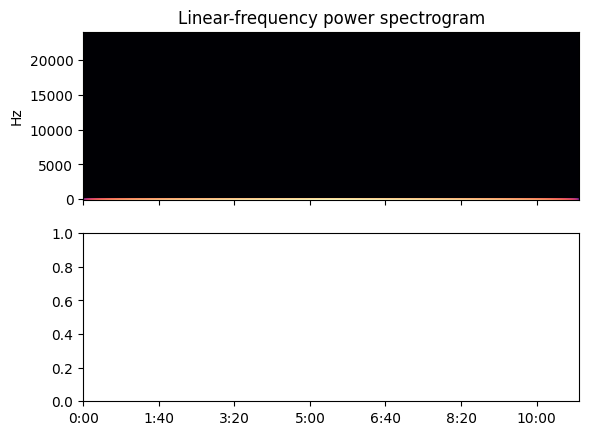

In [32]:
# import librosa.display as dp

# dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr, hop_length=hop_length)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(S, ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=fs, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

Hash geral gerado a partir dos picos e seus vizinhos: 2daa9846745f35154c5a09b835f83ae6cce5617be08a29e906935a56a2e8b394


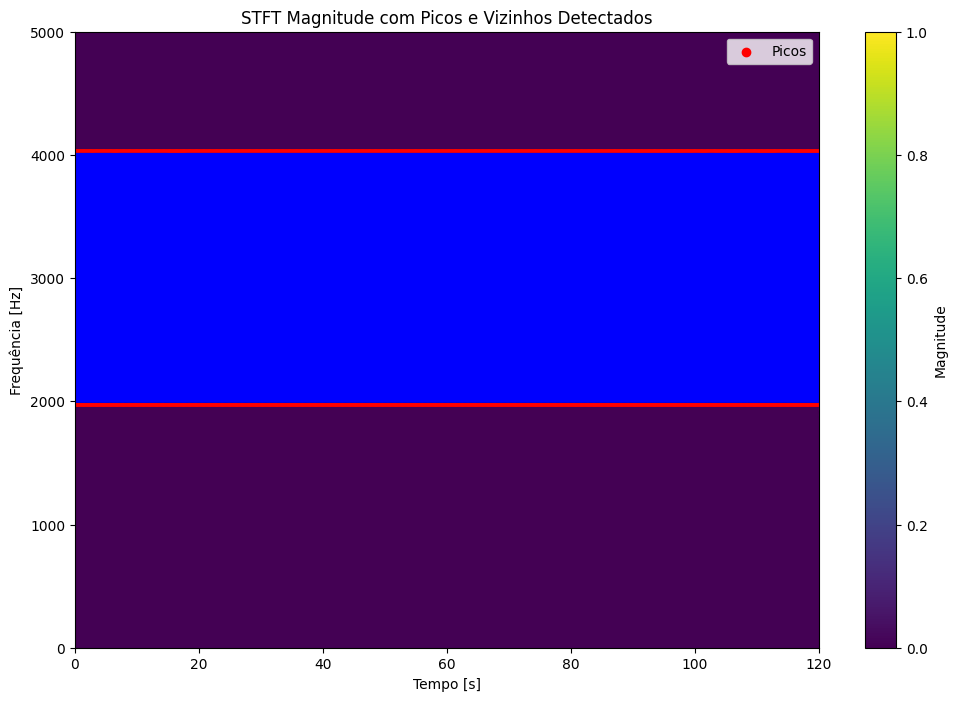

Número total de picos encontrados: 7035
Número de grupos de picos com 5 vizinhos: 7035
Hashes gerados para cada grupo de picos com 5 vizinhos:
Grupo 1: f48653dd20f94861136279e23fa203c8b10268e5d31ea5c3bb0f2cb1df15a33e
Grupo 2: f1d92fb1fa0b34e8666651245b912976d3a0ba050e2af0a8475fa723e2b4fa0a
Grupo 3: b0f7ce7f837325b186e106c93fa5c946f676ced3785cf40dfd4ad8a8ebc247dd
Grupo 4: 5e0448b3a3f142cd26fb5f6239c422f029745e3173f7c7d5a36f9edc85787ed3
Grupo 5: 12357606d569244bbac7354e3ac4eb64f4e466bb0640fa385fa38a5df3624390
Grupo 6: 5458ddffa5d2d79d083641754d8b2f9124a2c9538a697770f1fd364d10e93823
Grupo 7: f8503301f8211ce2ed692201d2cc36a9a16984defd04d0644834e85ac79efaad
Grupo 8: e5b8b4857036e4d3fd0be4f0ddfc58ae9074aaeadf9a18c436107b89d7259b64
Grupo 9: 40fe9671c9e2836619741904bf8a9a16d7e4f376179b9b64d75ee16f84caf9f4
Grupo 10: 07f27336deabce2edba72d258110f5bc2151dbe8908994e36565dd0d63775c7c
Grupo 11: 67f156df4590ec43aeae4845bf287a74a320955b2fc0287b7e4dd4eeb8a8b8ce
Grupo 12: 7144e776f55a4e1a51bbb7c307329ff

In [46]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import hashlib

# Passo 1: Parâmetros do sinal
fs = 10000  # Frequência de amostragem
duration = 120  # Duração do sinal em segundos (2 minutos)
t = np.linspace(0, duration, fs * duration, endpoint=False)  # Vetor de tempo

# Criar um sinal com senóides de maior frequência e amplitude
x = 5 * np.sin(2 * np.pi * 2000 * t) + 3 * np.sin(2 * np.pi * 3000 * t) + 2 * np.sin(2 * np.pi * 4000 * t)

# Passo 2: Parâmetros da STFT
nperseg = 1024  # Tamanho da janela maior para capturar mais detalhes
noverlap = nperseg // 2  # Sobreposição de 50%

# Computar a STFT
frequencies, times, Zxx = signal.stft(x, fs, nperseg=nperseg, noverlap=noverlap)

# Passo 3: Obter a magnitude da STFT e encontrar picos
magnitude = np.abs(Zxx)

peaks = []
for i in range(magnitude.shape[1]):
    col_peaks, _ = find_peaks(magnitude[:, i], height=0)
    for peak in col_peaks:
        peaks.append((i, peak, magnitude[peak, i]))

# Converter para array para manipulação mais fácil
peaks = np.array(peaks)

# Converter os índices para inteiros
peak_times = peaks[:, 0].astype(int)
peak_frequencies = peaks[:, 1].astype(int)

# Passo 4: Verificar os 5 picos vizinhos dentro de uma janela de 30 segundos
window_size = 30 * fs // (nperseg - noverlap)  # Convertendo 30 segundos para índices da STFT
neighbor_relationships = []
lines = []  # Armazena as coordenadas das linhas para plotar
groups_with_5_neighbors = 0  # Contador de grupos de picos com 5 vizinhos
hashes = []  # Lista para armazenar os hashes

for i, (time, freq, amp) in enumerate(peaks):
    # Definir a janela de tempo ao redor do pico atual
    start_time = max(0, time - window_size)
    end_time = min(magnitude.shape[1], time + window_size)
    
    # Procurar por picos na janela de tempo definida, excluindo o próprio pico
    neighbors = peaks[(peaks[:, 0] >= start_time) & (peaks[:, 0] <= end_time) & (peaks[:, 0] != time)]
    
    # Ordenar os vizinhos pela distância temporal do pico atual e selecionar os 5 mais próximos
    if len(neighbors) >= 5:
        distances = np.abs(neighbors[:, 0] - time)
        closest_neighbors = neighbors[np.argsort(distances)][:5]
        
        if len(closest_neighbors) == 5:
            groups_with_5_neighbors += 1
            group_str = f'{int(time)}-{int(freq)}'
        
            for neighbor in closest_neighbors:
                relationship_str = f'{int(time)}-{int(freq)}-{int(neighbor[0])}-{int(neighbor[1])}'
                neighbor_relationships.append(relationship_str)
                group_str += f'-{int(neighbor[0])}-{int(neighbor[1])}'
                # Adicionar coordenadas das linhas para visualização
                lines.append(((times[int(time)], frequencies[int(freq)]), (times[int(neighbor[0])], frequencies[int(neighbor[1])])))
            
            # Gerar um hash para o grupo
            hash_object = hashlib.sha256(group_str.encode())
            hash_hex = hash_object.hexdigest()
            hashes.append(hash_hex)

# Passo 5: Gerar um hash a partir das relações entre os picos e seus vizinhos (único hash geral)
neighbor_str = ''.join(neighbor_relationships)
hash_object = hashlib.sha256(neighbor_str.encode())
hash_hex_general = hash_object.hexdigest()

print("Hash geral gerado a partir dos picos e seus vizinhos:", hash_hex_general)

# Passo 6: Visualizar a magnitude da STFT e os picos detectados com as linhas de conexão
plt.figure(figsize=(12, 8))
plt.pcolormesh(times, frequencies, magnitude, shading='gouraud')
plt.scatter(times[peak_times], frequencies[peak_frequencies], color='red', label='Picos')

# Plotar as linhas de conexão entre os picos e seus vizinhos
for line in lines:
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', alpha=0.5)

plt.title('STFT Magnitude com Picos e Vizinhos Detectados')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.colorbar(label='Magnitude')
plt.legend()
plt.show()

# Passo 7: Informar o número total de picos e grupos de picos com 5 vizinhos
total_peaks = len(peaks)
print("Número total de picos encontrados:", total_peaks)
print("Número de grupos de picos com 5 vizinhos:", groups_with_5_neighbors)
print("Hashes gerados para cada grupo de picos com 5 vizinhos:")
for i, hash_hex in enumerate(hashes):
    print(f"Grupo {i+1}: {hash_hex}")
